In [ ]:
!git clone https://github.com/Chromathematics/Graphes_project_ARIA_2025/


from google.colab import drive
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
drive.mount('/content/drive',force_remount=True)

# Welcome in the resumed code of the project "Bench-press vs Squat, Bench-press and Deadlift competitions in athletes improvement."

First, you will be asked to reproduce the results if you prefere to use restrictive or loose criteria for athletes. 
Restrictive criteria : athletes should have performed only in bench press competitions or SBD, not other competition allowed. The event should be unequipped ('Raw'). For loose criteria, equipment are mixed (any kind of equippement of unequipped event are compared) and an athlete performing bench-press competition (resp. SBD) can also compete in other competitions except SBD (resp. Bench-press) to be selected. 

In [99]:
# Please select LOOSE = False if you want restrictive criteria and True if you want loose criteria
LOOSE = False 
if LOOSE==False:
    RESTRICTIVE = True
else: 
    RESTRICTIVE = False 

if LOOSE==True:
    cr = "loose"
else:
    cr = "restrictive"

# Importing data and restraining to competitions after 2000.

In [ ]:
folder = r"/content/Graphes_project_ARIA_2025/"
document = f"{folder}openpowerlifting-2025-10-04-4b85fd282000.csv"
df = pandas.read_csv(document, header=0, sep=",",low_memory=False)
def extract_year(donnee):
    name=donnee.split('-')
    name=name[0]
    return(int(float(name)))
df['YearEvent'] = df['Date'].apply(extract_year)
if RESTRICTIVE : 
    df = df.drop(df.loc[df['Equipment'] != 'Raw'].index)
df=df[df['YearEvent']>2000]

# After importation : Annual improvement computing

/!\ This section requires a lot of computational time. If you do NOT want to run this section, you can use the pre-computated datas available on Github with loose or restrictive criteria. Computating or not will not result in changes in next sections. 

## Annual Improvement function

$AI =\frac{W^{n+y}-W^{n}}{y}$ \
$W^n$ weight in movement i in year n, $W^{n+y}$ in year y+n, y the gap bewteen years.

If you want, you can un-hashtag the AI_athlete function to have an example of Marina Gorbachyova's annual improvement

In [ ]:
df2=df.copy()
T=df2['Name'].unique()
print(f"{len(T)} athletes are represented in the file with {cr} criteria")

KeyboardInterrupt: 

In [ ]:
def calculation_AI(Perf1,Perf2,year): 
    AI=(Perf1-Perf2)/year
    return(AI)

def AI_athletes(athlete):
    working=df2.loc[df2['Name']==athlete]
    dfs_by_event = {event: df_group for event, df_group in working.groupby('Event')}
    
    Gender=[]
    Event=[]
    Age=[]
    Weight=[]
    AI_liste=[]
    if RESTRICTIVE==True:
        if len(dfs_by_event) >=2:  
            return([],[],[],[],[])
        else:

            k = list(dfs_by_event.keys())[0]
            G = dfs_by_event.get(k)
            n= len(G)
            if n>1:
                Indice=list(G.index)
                n=len(Indice)
                for i in range(n-1):
                    line=G.iloc[i]
                    line2=G.iloc[i+1]
                    year=line['YearEvent']-line2['YearEvent']
                    if year==0:
                        continue
                    else:
                        perf=line['Best3BenchKg']
                        perf2=line2['Best3BenchKg']
                        AI=calculation_AI(perf,perf2,year)
                        Gender.append(line['Sex'])
                        Event.append(line['Event'])
                        Age.append(line['AgeClass'])
                        Weight.append(line['BodyweightKg'])
                        AI_liste.append(AI)
                return(Gender,Event,Age,Weight,AI_liste)
    if RESTRICTIVE == False:
        if 'B' in dfs_by_event.keys():
            if 'SBD' in dfs_by_event:
                return([],[],[],[],[])
            else:
                G = dfs_by_event.get('B')
                n= len(G)
                if n>1:
                    Indice=list(G.index)
                    n=len(Indice)
                    for i in range(n-1):
                        line=G.iloc[i]
                        line2=G.iloc[i+1]
                        year=line['YearEvent']-line2['YearEvent']
                        if year==0:
                            continue
                        else:
                            perf=line['Best3BenchKg']
                            perf2=line2['Best3BenchKg']
                            AI=calculation_AI(perf,perf2,year)
                            Gender.append(line['Sex'])
                            Event.append(line['Event'])
                            Age.append(line['AgeClass'])
                            Weight.append(line['BodyweightKg'])
                            AI_liste.append(AI)
                    return(Gender,Event,Age,Weight,AI_liste)
        if 'SBD' in dfs_by_event.keys():
            if 'B' in dfs_by_event:
                return([],[],[],[],[])
            else:
                G = dfs_by_event.get('SBD')
                n= len(G)
                if n>1:
                    Indice=list(G.index)
                    n=len(Indice)
                    for i in range(n-1):
                        line=G.iloc[i]
                        line2=G.iloc[i+1]
                        year=line['YearEvent']-line2['YearEvent']
                        if year==0:
                            continue
                        else:
                            perf=line['Best3BenchKg']
                            perf2=line2['Best3BenchKg']
                            AI=calculation_AI(perf,perf2,year)
                            Gender.append(line['Sex'])
                            Event.append(line['Event'])
                            Age.append(line['AgeClass'])
                            Weight.append(line['BodyweightKg'])
                            AI_liste.append(AI)
                    
    return(Gender,Event,Age,Weight,AI_liste)


def AI_global():
    i=0
    Athletes_names=df2['Name'].unique()
    G=[]
    A=[]
    E=[]
    W=[]
    AI=[]
    for athlete in Athletes_names:
        i+=1
        Gender,Event,Age,Weight,AI_liste=AI_athletes(athlete)
        G.extend(Gender)
        A.extend(Age)
        W.extend(Weight)
        AI.extend(AI_liste)
        E.extend(Event)
        if i%10000==0:
            print(i)
            dictionnaire = {'Gender':G,'AgeClass':A,'Event':E,'WeightClass':W,'AnnualImprovement':AI}
            df3=pandas.DataFrame.from_dict(dictionnaire)
            df3.to_csv(f"{folder}{cr}criteria_AnnualImprovement.csv",index=False,header=True)
    return(G,A,E,W,AI)
G,A,E,W,AI=AI_global()
G_copy,A_copy,E_copy,W_copy,AI_copy=G,A,E,W,AI
dictionnaire = {'Gender':G_copy,'AgeClass':A_copy,'Event':E_copy,'WeightClass':W_copy,'AnnualImprovement':AI_copy}
df3=pandas.DataFrame.from_dict(dictionnaire)
df3.to_csv(f"{folder}{cr}criteria_AnnualImprovement.csv",index=False,header=True)

10000
20000
30000
40000


KeyboardInterrupt: 

# Study of R/L dataset

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as student_test
df3 = pandas.read_csv(f"{folder}{cr}criteria_AnnualImprovement.csv", header=0)

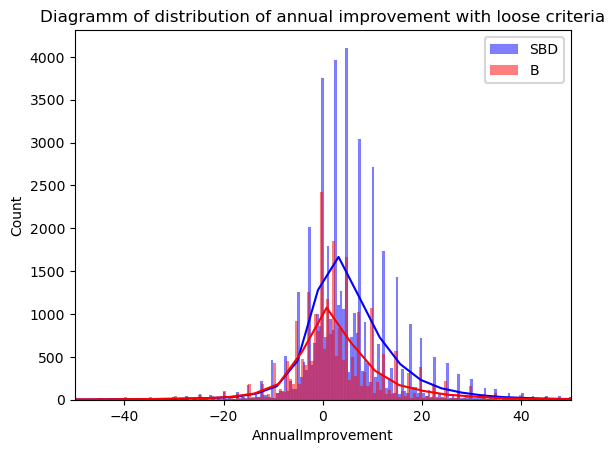

Average annual improvement for SBD in loose cohort : 5.363138472882317
Average annual improvement for B in loose cohort : 3.010313149076832


In [93]:
# Statistic studies on annual improvement
SBD = df3['AnnualImprovement'].loc[df3['Event']=='SBD']
B = df3['AnnualImprovement'].loc[df3['Event']=='B']

plt.figure()
plt.title(f"Diagramm of distribution of annual improvement with {cr} criteria")
sns.histplot(SBD, color="blue",label="SBD", kde=True)
sns.histplot(B, color="red",label="B",kde=True)
plt.xlim(-50,50)
#plt.ylim(0,4000)
plt.legend()
plt.savefig(f"{folder}{cr}_histplot.pdf")
plt.show()
print(f"Average annual improvement for SBD in {cr} cohort : {np.mean(SBD)}")
print(f"Average annual improvement for B in {cr} cohort : {np.mean(B)}")

# integer values for algorithm understanding


In [ ]:
df3=df3.dropna()
#Gender conversion
df3 = df3[df3['Gender']!="Mx"]
def convertir_gender(gender):
    if gender == 'M':
        return(0)
    if gender == 'F':
        return(1)
df3['Gender'] = df3['Gender'].apply(convertir_gender)


# Event conversion : SBD = 0, B = 1
d = {'SBD': 0,'B' : 1}
df3['Event']=df3['Event'].map(d)
# AgeClass conversion
def age_conversion2(stringage):
    stringage = str(stringage)
    if '-' in stringage:
        a = stringage.split('-')
        a=[float(f) for f in a]
    else :
        a = [float(stringage)]
    a = np.mean(a)
    a = int(float(a))
    return(a)
df3['AgeClass'] = df3['AgeClass'].apply(age_conversion2)
#WeightClass conversion

df3 = df3.drop(df3.loc[df3['WeightClass']=='+'].index)
def weight_to_cat(poids):
    poids = int(float(poids))
    return(poids)
df3['WeightClass'] = df3['WeightClass'].apply(weight_to_cat)
# Annual Improvement
def float_to_int(annual):
    return(int(annual))
df3['AnnualImprovement'] = df3['AnnualImprovement'].apply(float_to_int)

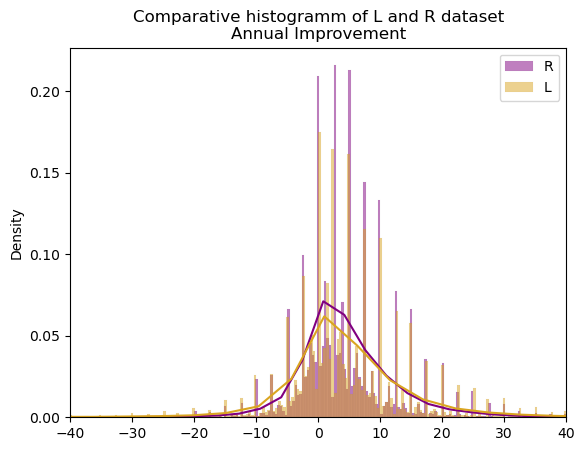

In [43]:
plt.figure()
plt.title("Comparative histogramm of L and R dataset\nAnnual Improvement")
sns.histplot(df32['AnnualImprovement'].dropna().values,color="purple", label="R",kde=True,stat="density")
sns.histplot(df31['AnnualImprovement'].dropna().values,color="goldenrod", label="L",kde=True,stat="density")
plt.xlim(-40,40)
#plt.ylim(0,2100)
plt.legend()
plt.savefig(f"{folder}comparativehist_L_Rdataset.pdf")
plt.show()


# CART decision tree
X : athlete $X_i$ : weight category, country, age, annual improvement  
Y : Annual improvement for the athlete $X_i$

c:\Users\rouxm\anaconda3\envs\graphe_env\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.6917870036101083
[[3500  932]
 [1800 2632]]
              precision    recall  f1-score   support

         0.0       0.66      0.79      0.72      4432
         1.0       0.74      0.59      0.66      4432

    accuracy                           0.69      8864
   macro avg       0.70      0.69      0.69      8864
weighted avg       0.70      0.69      0.69      8864



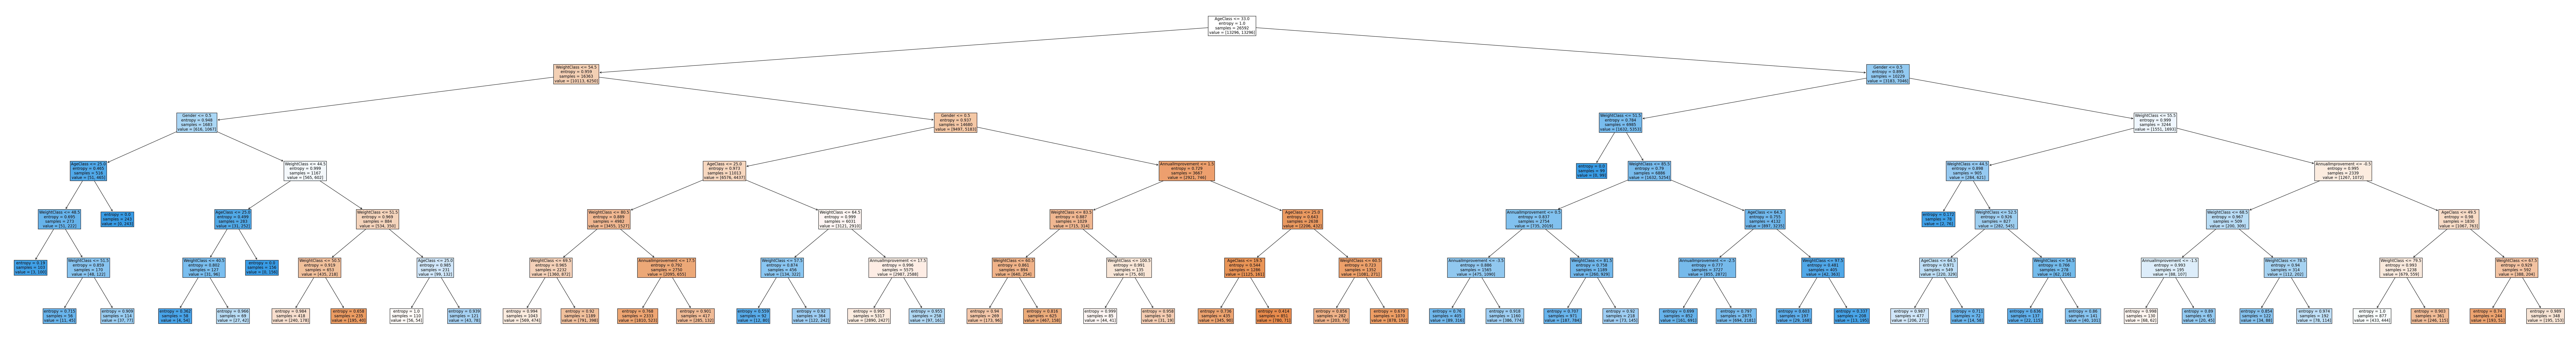

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree

df3=df3.dropna()
features = ['WeightClass','AgeClass','Gender','AnnualImprovement']
X=df3[features]
Y=df3['Event']
und = RandomUnderSampler(sampling_strategy='not minority', random_state=130)
X,Y = und.fit_resample(X,Y)


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)
critere = 'entropy'
dtree = DecisionTreeClassifier(criterion=critere,class_weight='balanced',max_depth=6,min_samples_leaf=50)
dtree = dtree.fit(X_train.values, y_train.values)
y_pred = dtree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




plt.rcParams['patch.edgecolor'] = 'black'
plt.rcParams['patch.linewidth'] = 1.5

plt.figure(figsize=(150, 20))

tree.plot_tree(dtree,
    feature_names=features,
    filled=True,
    fontsize=16
)

plt.tight_layout()
plt.savefig(f"{folder}{cr}_CART_DT.pdf")
plt.show()



c:\Users\rouxm\anaconda3\envs\graphe_env\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy, restrictive dataset : 0.6926904395213838
[[3183 1038]
 [1556 2664]]
              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71      4221
         1.0       0.72      0.63      0.67      4220

    accuracy                           0.69      8441
   macro avg       0.70      0.69      0.69      8441
weighted avg       0.70      0.69      0.69      8441



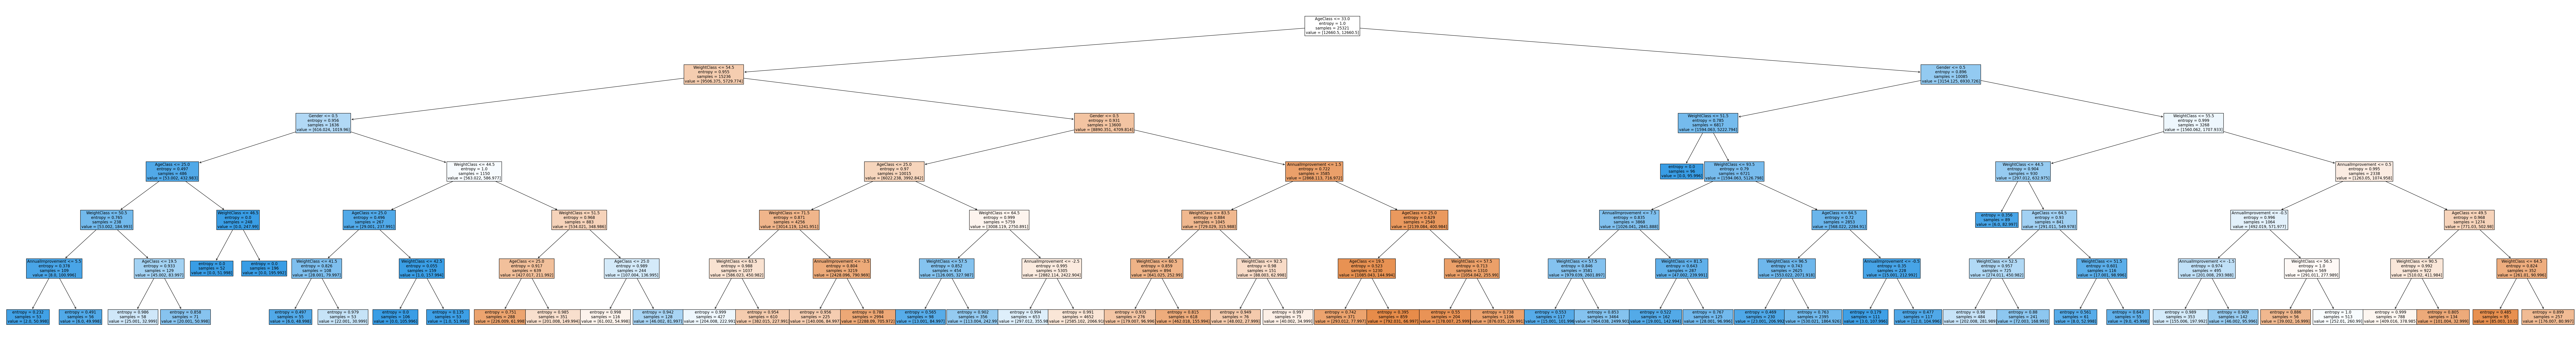

In [ ]:
#CART excluding outliers
Q1= np.quantile(df3['AnnualImprovement'], 0.25)
Q3= np.quantile(df3['AnnualImprovement'], 0.75)
L=Q1-1.5*(Q3-Q1)
U=Q3+1.5*(Q3-Q1)
df4=df3[df3['AnnualImprovement']>L]
df4=df3[df3['AnnualImprovement']<U]
features = ['WeightClass','AgeClass','Gender','AnnualImprovement']
X=df4[features]
Y=df4['Event']
und = RandomUnderSampler(sampling_strategy='not minority', random_state=130)
X,Y = und.fit_resample(X,Y)


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)
critere = 'entropy'
dtree = DecisionTreeClassifier(criterion=critere,class_weight='balanced',max_depth=6,min_samples_leaf=50)
dtree = dtree.fit(X_train.values, y_train.values)
y_pred = dtree.predict(X_test)

print(f"Accuracy, {cr} dataset :", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.rcParams['patch.edgecolor'] = 'black'
plt.rcParams['patch.linewidth'] = 1.5

plt.figure(figsize=(150, 20))

tree.plot_tree(dtree,
    feature_names=features,
    filled=True,
    fontsize=16
)

plt.tight_layout()
plt.savefig(f"{folder}{cr}_CART_DT_outliersQuantiles.pdf")
plt.show()



# SVM classifier

In [21]:
from sklearn import svm
clf = svm.SVC(kernel='rbf') # polynomial Kernel #linear, rbf, poly, sigmoid
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6827095866864599
[[4480 1920]
 [2141 4258]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      6400
           1       0.69      0.67      0.68      6399

    accuracy                           0.68     12799
   macro avg       0.68      0.68      0.68     12799
weighted avg       0.68      0.68      0.68     12799

